In [ ]:
import json

In [ ]:
import urllib

In [ ]:
import pandas as pd

In [ ]:
import requests

In [ ]:
from datetime import date

In [ ]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
result = requests.get('https://api.covidactnow.org/v2/states.timeseries.json?apiKey=1540d77cf9a0422b88a2d90e989bbd23')

In [ ]:
result.status_code

In [ ]:
state_json = result.json()

In [ ]:
state_str = json.dumps(state_json,indent=2)

In [ ]:
state_json

In [ ]:
type(state_json)

In [ ]:
state_json[0]

In [ ]:
state_json[1]

In [ ]:
for state_summary in state_json:
     metric=pd.DataFrame(state_summary['metricsTimeseries'])        

In [ ]:
type(metric)

In [ ]:
if state_summary['metricsTimeseries']:
    metrics=pd.DataFrame(metric[['date','testPositivityRatio','caseDensity','contactTracerCapacityRatio','infectionRate','infectionRateCI90','icuHeadroomRatio','icuCapacityRatio']])

In [ ]:
metrics['month-year'] = metrics['date'].str.slice(0,7)

In [ ]:
metrics.groupby('month-year').mean()

In [ ]:
for state_summary in state_json:
     actual=pd.DataFrame(state_summary['actualsTimeseries'])        

In [ ]:
if state_summary['actualsTimeseries']:
    actuals=pd.DataFrame(actual[['date','cases','deaths','positiveTests','negativeTests','newCases','newDeaths']])

In [ ]:
actuals['month-year'] = actual['date'].str.slice(0,7)

In [ ]:
actuals.groupby('month-year').mean()

In [ ]:
save_data = []

In [ ]:
def get_metrics():
    state_json = result.json()
    for state_summary in state_json:
        metrics=pd.DataFrame(state_summary['metricsTimeseries']) 
        metrics['month-year'] = metrics['date'].str.slice(0,7)
        state=state_summary['state']
        metricstime = metrics.groupby('month-year').mean() 
        metricstime['state']=state
        print(metricstime)
     

In [ ]:
get_metrics()

In [ ]:
save_data

In [64]:
def get_actuals():
    state_json = result.json()
    for state_summary in state_json:
        actuals=pd.DataFrame(state_summary['actualsTimeseries']) 
        actuals['month-year'] = actuals['date'].str.slice(0,7)
        state=state_summary['state']
        state_actual = actuals.groupby('month-year').mean()
        state_actual['state']=state
        return state_actual

In [65]:
get_actuals()

,cases,deaths,positiveTests,negativeTests,contactTracers,newCases,newDeaths,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted,vaccinesAdministered,state
month-year,,,,,,,,,,,,
2020-03,42.550000,0.400000,67.952381,1.949258e+03,NaN,6.650000,0.100000,NaN,NaN,NaN,NaN,AK
2020-04,274.366667,5.766667,359.833333,1.452803e+04,NaN,7.333333,0.166667,NaN,NaN,NaN,NaN,AK
2020-05,395.354839,7.838710,516.774194,4.093090e+04,143.095238,3.741935,0.032258,NaN,NaN,NaN,NaN,AK
2020-06,766.766667,9.700000,1026.000000,9.631263e+04,132.033333,22.100000,0.133333,NaN,NaN,NaN,NaN,AK
2020-07,2181.709677,16.000000,3393.516129,2.120073e+05,155.451613,82.032258,0.290323,NaN,NaN,NaN,NaN,AK
2020-08,4995.838710,27.193548,8355.645161,3.733751e+05,211.161290,80.166667,0.419355,NaN,NaN,NaN,NaN,AK
2020-09,7341.100000,42.166667,13021.000000,5.387370e+05,234.000000,87.733333,0.600000,NaN,NaN,NaN,NaN,AK
2020-10,11847.129032,60.967742,23164.193548,7.111801e+05,234.000000,243.225806,0.806452,NaN,NaN,NaN,NaN,AK
2020-11,24034.533333,93.400000,50985.400000,9.469694e+05,234.000000,538.666667,1.266667,NaN,NaN,NaN,NaN,AK


In [69]:
state_actuals_pd=pd.DataFrame(get_actuals())        

In [73]:
(state_actuals_pd)

,cases,deaths,positiveTests,negativeTests,contactTracers,newCases,newDeaths,vaccinesDistributed,vaccinationsInitiated,vaccinationsCompleted,vaccinesAdministered,state
month-year,,,,,,,,,,,,
2020-03,42.550000,0.400000,67.952381,1.949258e+03,NaN,6.650000,0.100000,NaN,NaN,NaN,NaN,AK
2020-04,274.366667,5.766667,359.833333,1.452803e+04,NaN,7.333333,0.166667,NaN,NaN,NaN,NaN,AK
2020-05,395.354839,7.838710,516.774194,4.093090e+04,143.095238,3.741935,0.032258,NaN,NaN,NaN,NaN,AK
2020-06,766.766667,9.700000,1026.000000,9.631263e+04,132.033333,22.100000,0.133333,NaN,NaN,NaN,NaN,AK
2020-07,2181.709677,16.000000,3393.516129,2.120073e+05,155.451613,82.032258,0.290323,NaN,NaN,NaN,NaN,AK
2020-08,4995.838710,27.193548,8355.645161,3.733751e+05,211.161290,80.166667,0.419355,NaN,NaN,NaN,NaN,AK
2020-09,7341.100000,42.166667,13021.000000,5.387370e+05,234.000000,87.733333,0.600000,NaN,NaN,NaN,NaN,AK
2020-10,11847.129032,60.967742,23164.193548,7.111801e+05,234.000000,243.225806,0.806452,NaN,NaN,NaN,NaN,AK
2020-11,24034.533333,93.400000,50985.400000,9.469694e+05,234.000000,538.666667,1.266667,NaN,NaN,NaN,NaN,AK


C:\Users\Kanis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deaths', ylabel='cases'>

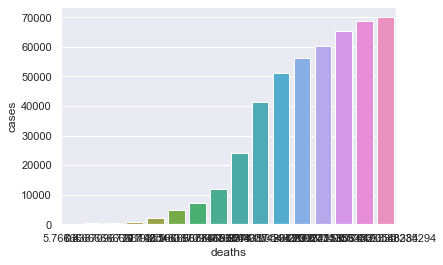

In [79]:
sns.barplot(state_actuals_pd['deaths'],state_actuals_pd['cases'])

In [ ]:
access_token = device_auth.get_access_token()

In [ ]:
Report = Report(group_id=group_id,report_id=report_id,auth=device_auth)